# import lib

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to database

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [4]:
cur=conn.cursor()

# q1

In [4]:
sql_q1 = """
            select * from gp21.student 
            """


In [5]:
df=pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,taylorhe@dukes.jmu.edu,Hannah Taylor,IA
1,audlins@dukes.jmu.edu,Audrey Lindsay,Physics
2,emruby@dukes.jmu.edu,Emily Ruby,Comm
3,livodon@dukes.jmu.edu,Olivia Odonnell,Polysci


# q2

In [8]:
sql_q2 = """
        select gp21.professor.p_name,
        gp21.course.c_name
        from gp21.professor
        inner join gp21.course
        on gp21.professor.p_email = gp21.course.p_email
        
        """

In [9]:
df=pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Orlandrew Danzell,Intro to Nat Sec
1,Stephen Marrin,Issues in IA
2,Xuebin Wei,Data Mining
3,new prof,new course
4,new prof,Counterfactual Reasoning


## q3

In [14]:
sql_q3 = """
     select c_number,
     count (c_number) as enrolled
     from gp21.enroll_list
     group by c_number
     order by enrolled desc
     """

<AxesSubplot:xlabel='c_number'>

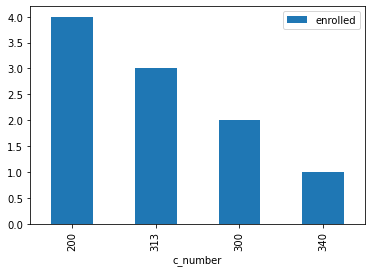

In [15]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [16]:
sql_q4 = """
        select gp21.professor.p_name,
       count(gp21.course.c_name) as teaching_number
        from gp21.professor
        inner join gp21.course
        on gp21.professor.p_email = gp21.course.p_email
        group by professor.p_name
        order by teaching_number desc
"""

<AxesSubplot:xlabel='p_name'>

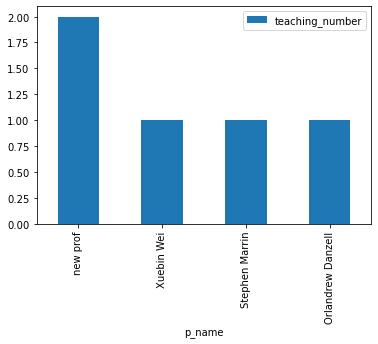

In [20]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [29]:
sql_q5_professor = """
                  insert into gp21.professor(p_email,p_name,p_office) 
                  values('{}','{}','{}')
                  """.format('new_p@jmu.edu','new_p','new_office')

In [30]:
cur.execute(sql_q5_professor)

In [31]:
conn.commit()

In [32]:
df= pandas.read_sql_query("select * from gp21.professor",conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,ISAT 963
1,marrinsp@jmu.edu,Stephen Marrin,engeo 2104
2,weixx@jmu.edu,Xuebin Wei,ISAT 112
3,newprof@jmu.edu,new prof,543
4,new_p@jmu.edu,new_p,new_office


In [45]:
sql_q5_course = """
                  insert into gp21.professor(c_number,c_name,p_email) 
                  values('{}','{}','{}')
                  """.format('ia_new','new_c_name','new_p@jmu.edu')

In [46]:
cur.execute(sql_q5_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [47]:
conn.rollback()

In [48]:
df= pandas.read_sql_query("select * from gp21.course",conn)
df[:]

,c_number,c_name,c_room,p_email
0,200,Intro to Nat Sec,124,danzelox@jmu.edu
1,300,Issues in IA,150,marrinsp@jmu.edu
2,340,Data Mining,2010,weixx@jmu.edu
3,222,new course,545,newprof@jmu.edu
4,313,Counterfactual Reasoning,234,newprof@jmu.edu


## q6

In [49]:
sql_q6_course = """
                update gp21.course
                set p_email ='{}'
                where p_email = '{}'
                
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [50]:
cur.execute(sql_q6_course)

In [51]:
conn.commit()

In [52]:
df= pandas.read_sql_query("select * from gp21.course",conn)
df[:]

,c_number,c_name,c_room,p_email
0,200,Intro to Nat Sec,124,danzelox@jmu.edu
1,300,Issues in IA,150,marrinsp@jmu.edu
2,222,new course,545,newprof@jmu.edu
3,313,Counterfactual Reasoning,234,newprof@jmu.edu
4,340,Data Mining,2010,new_p@jmu.edu


In [53]:
sql_q6_professor = """
                delete from gp21.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [54]:
cur.execute(sql_q6_professor)

In [55]:
conn.commit()

In [56]:
df= pandas.read_sql_query("select * from gp21.professor",conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,ISAT 963
1,marrinsp@jmu.edu,Stephen Marrin,engeo 2104
2,newprof@jmu.edu,new prof,543
3,new_p@jmu.edu,new_p,new_office


## close connection 

In [57]:
cur.close()

In [58]:
conn.close()